In [1]:
from scipy.stats import poisson
import numpy as np

In [2]:
np.random.seed(seed=8675309)

In [3]:
n = 100000
p=10
d = np.random.poisson(size=n, lam=p)

In [4]:
p*n-d.sum()

-415

In [5]:
import matplotlib.pyplot as plt

In [6]:
%matplotlib inline

In [7]:
cd ../code/snc

/home/egor/code/snc


In [8]:
from snc.meio.gsm.utils import read_supply_chain_from_txt

In [9]:
from snc.experiment.numerical_simulator import simulate,compute_base_stocks
from snc.experiment.vis_utils import plot_cascading_effect

In [10]:
stages = read_supply_chain_from_txt("snc/experiment/basic_serial_network_config.txt")

In [11]:
policy = {"Supply":{"s":3,"si":0},"Demand":{"s":0,"si":3}}

In [13]:
lam = 10

base_stocks = compute_base_stocks(stages,policy,lam,0.95)

np.random.seed(seed=8675309)
indep_inv_histories = simulate(stages,policy,base_stocks,lam,100000,stockout_stages=None)
np.random.seed(seed=8675309)
casc_inv_histories = simulate(stages,policy,base_stocks,lam,100000,stockout_stages==[])

TypeError: compute_base_stocks() missing 1 required positional argument: 'sla'

In [13]:
base_stocks

{'Supply': 297, 'Demand': 39}

In [14]:
plt.vlines()

TypeError: vlines() missing 3 required positional arguments: 'x', 'ymin', and 'ymax'

In [18]:
poisson.ppf(0.95,30)

39.0

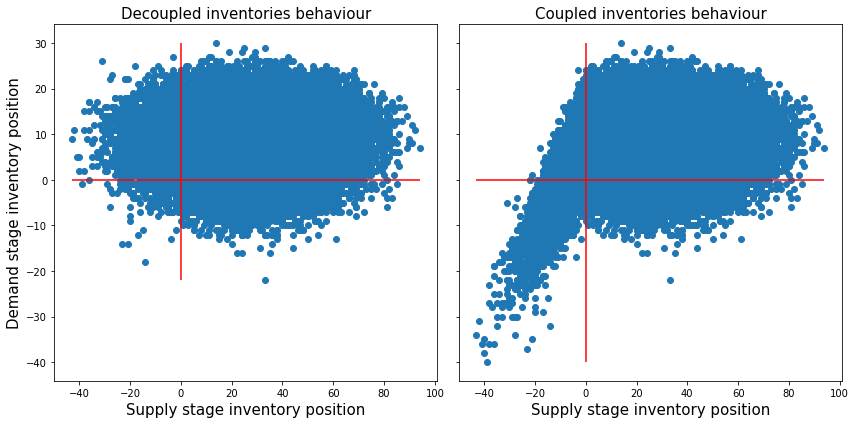

In [15]:
plot_cascading_effect(casc_inv_histories,indep_inv_histories,["Supply","Demand"],time_length=n,remove_transient=True)

In [35]:
inv_pos_histories

{'Supply': array([297., 297., 297., ...,  40.,  42.,  45.]),
 'Demand': array([39., 30., 21., ..., 14., 14., 17.])}

In [23]:
s_1 = 0 # customer stage
s_2 = 3

si_1 = s_2
si_2 = 0

l_1 = 0
l_2 = 30

tau_1 = si_1+l_1-s_1
tau_2 = si_2+l_2-s_2

s_1_q = np.zeros(n+s_1+1)
s_1_q[-n:] = d
r_1_q = np.zeros(n+si_1+l_1+1)
r_1_q[-n:] = d
r_1_q_ = r_1_q.copy()

s_2_q = np.zeros(n+s_2+1)
s_2_q[-n:] = d
r_2_q = np.zeros(n+si_2+l_2+1)
r_2_q[-n:] = d

In [21]:
np.minimum(d,p+1).max()

11

In [22]:
s_1 = 0 # customer stage
s_2 = 3

si_1 = s_2
si_2 = 0

l_1 = 0
l_2 = 30

tau_1 = si_1+l_1-s_1
tau_2 = si_2+l_2-s_2

s_1_q = np.zeros(n+s_1+1)
s_1_q[-n:] = d
r_1_q = np.zeros(n+si_1+l_1+1)
r_1_q[-n:] = d
r_1_q_ = r_1_q.copy()

s_2_q = np.zeros(n+s_2+1)
s_2_q[-n:] = d
r_2_q = np.zeros(n+si_2+l_2+1)
r_2_q[-n:] = d

In [269]:
s_2_q[:20]

array([ 0.,  0.,  0.,  0., 12.,  8., 12.,  9., 11.,  6., 11., 12.,  6.,
        7.,  5., 10.,  6., 12.,  8., 12.])

In [25]:
def percentile(percentile,mean):
    i = mean
    while True:
        if poisson.cdf(i,mean) >= percentile:
            return i
        i += 1

In [26]:
b_1 = percentile(0.95,tau_1*p)
b_2 = percentile(0.95,tau_2*p)

In [27]:
b_1

39

In [28]:
b_2

297

In [31]:
b_2 = tau_2*p

In [29]:
i_1_q_ = b_1+np.cumsum(r_1_q_[:len(s_1_q)]-s_1_q)
np.mean(i_1_q_ < 0)

0.046489535104648955

In [30]:
i_2_q = b_2+np.cumsum(r_2_q[:len(s_2_q)]-s_2_q)
np.mean(i_2_q < 0)

0.05176792928282869

In [31]:
i_1_q = b_1+np.cumsum(r_1_q[:len(s_1_q)]-s_1_q)
np.mean(i_1_q < 0)

0.046489535104648955

In [41]:
np.mean(inv_pos_histories["Supply"][:n] < 0)

0.0572

In [32]:
np.corrcoef(i_1_q_[100:n],i_2_q[100:n])

array([[1.        , 0.00701307],
       [0.00701307, 1.        ]])

In [33]:
np.corrcoef(i_1_q[100:n],i_2_q[100:n])

array([[1.        , 0.00701307],
       [0.00701307, 1.        ]])

In [53]:
np.corrcoef(inv_pos_histories["Demand"][100:n],inv_pos_histories["Supply"][100:n])

array([[1.        , 0.01722558],
       [0.01722558, 1.        ]])

In [38]:
np.corrcoef(inv_pos_histories["Demand"][100:n],inv_pos_histories["Supply"][100:n])

array([[1.        , 0.01722558],
       [0.01722558, 1.        ]])

In [ ]:
plt.hlines()

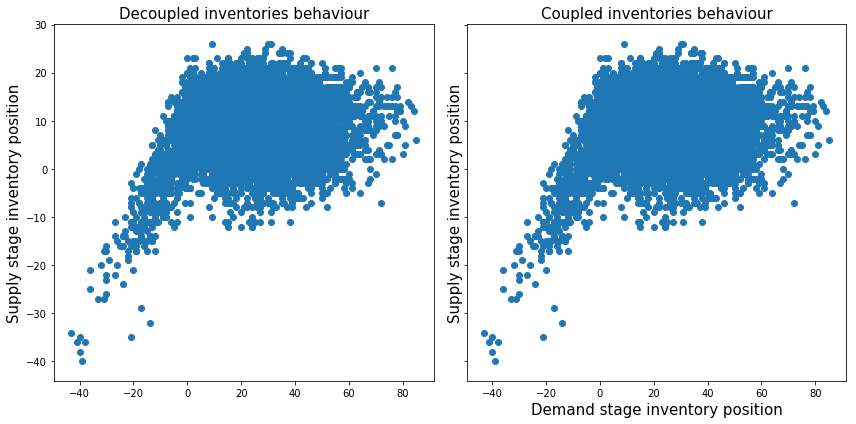

In [70]:
f,ax = plt.subplots(1,2,figsize=(12,6),sharey=True)
ax[0].scatter(inv_pos_histories["Supply"][100:n],inv_pos_histories["Demand"][100:n])
ax[0].set_ylabel("Supply stage inventory position",fontsize=15)
ax[0].set_title("Decoupled inventories behaviour",fontsize=15)
ax[1].scatter(inv_pos_histories["Supply"][100:n],inv_pos_histories["Demand"][100:n])
ax[1].set_ylabel("Supply stage inventory position",fontsize=15)
ax[1].set_xlabel("Demand stage inventory position",fontsize=15)
ax[1].set_title("Coupled inventories behaviour",fontsize=15)
f.tight_layout()

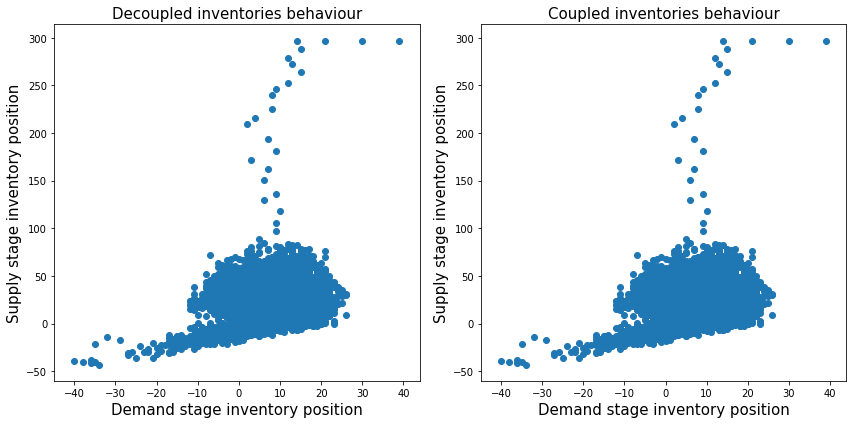

In [68]:
f,ax = plt.subplots(1,2,figsize=(12,6),sharex=True)
ax[0].scatter(inv_pos_histories["Demand"][:n],inv_pos_histories["Supply"][:n])
ax[0].set_ylabel("Supply stage inventory position",fontsize=15)
ax[0].set_title("Decoupled inventories behaviour",fontsize=15)
ax[0].set_xlabel("Demand stage inventory position",fontsize=15)
ax[1].scatter(inv_pos_histories["Demand"][:n],inv_pos_histories["Supply"][:n])
ax[1].set_ylabel("Supply stage inventory position",fontsize=15)
ax[1].set_xlabel("Demand stage inventory position",fontsize=15)
ax[1].set_title("Coupled inventories behaviour",fontsize=15)
f.tight_layout()

In [63]:
pos = i_2_q.copy()
neg = -i_2_q.copy()
pos[pos<0] = 0
neg[neg<0] = 0

In [64]:
required_r = neg[:len(s_2_q)-1]+s_2_q[1:]

In [65]:
available_r = pos+r_2_q[1:len(pos)+1]

In [66]:
assert len(available_r) >= len(required_r)

In [67]:
r_1_q_actual = np.minimum(available_r[:len(required_r)],required_r)

In [68]:
r_1_q[-n:] = r_1_q_actual[-n:]

In [69]:
i_1_q = b_1+np.cumsum(r_1_q[:len(s_1_q)]-s_1_q)
np.mean(i_1_q < 0)

0.06437935620643793

In [70]:
np.mean(i_1_q_ < 0)

0.046489535104648955

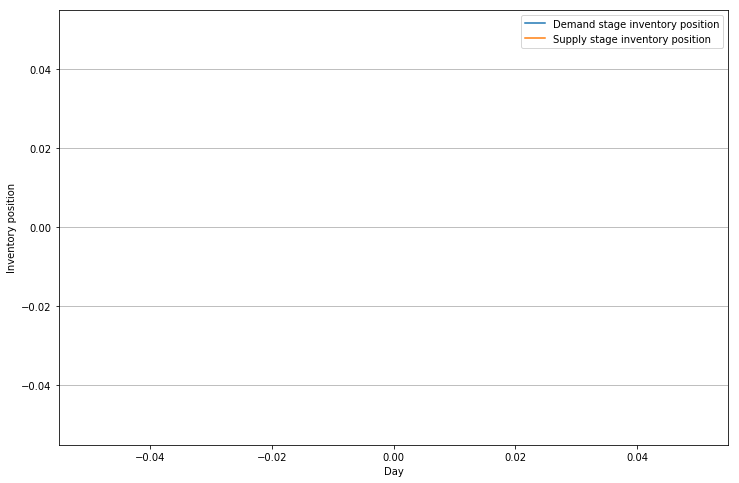

In [322]:
window = 200
s = 11280-window
e = s+2*window
plt.figure(figsize=(12,8))
plt.plot(i_1_q[s:e],label="Demand stage inventory position")
plt.plot(i_2_q[s:e],label="Supply stage inventory position")
plt.ylabel("Inventory position")
plt.xlabel("Day")
plt.grid(axis="y")
plt.legend()

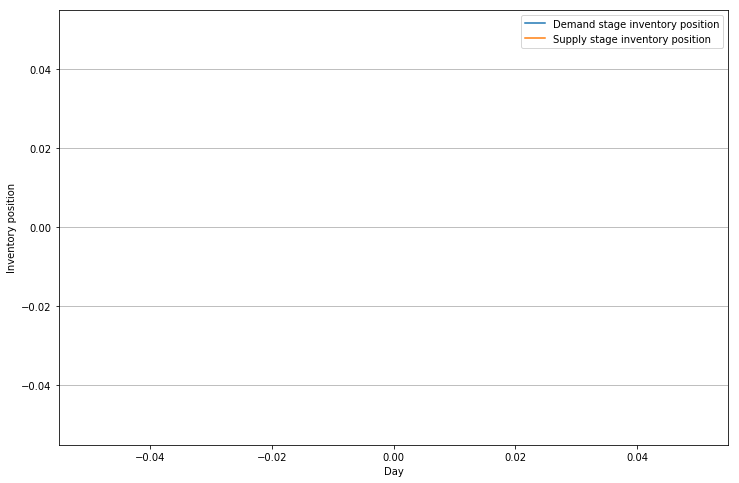

In [323]:
s = 22145-100
e = s+200
plt.figure(figsize=(12,8))
plt.plot(i_1_q[s:e],label="Demand stage inventory position")
plt.plot(i_2_q[s:e],label="Supply stage inventory position")
plt.ylabel("Inventory position")
plt.xlabel("Day")
plt.grid(axis="y")
plt.legend()

In [32]:
((i_1_q < 0) & (i_2_q[:len(i_1_q)] < 0)).mean()

0.016979830201697983

In [33]:
((i_1_q >= 0) & (i_2_q[:len(i_1_q)] < 0)).mean()

0.03044969550304497

In [34]:
((i_1_q < 0) & (i_2_q[:len(i_1_q)] >= 0)).mean()

0.04359956400435996

In [35]:
stockouts_1 = (i_1_q[-n:] < 0)
stockouts_1_ = (i_1_q_[-n:] < 0)
stockouts_2 = (i_2_q[-n:] < 0)

In [36]:
np.argwhere(i_2_q[-n:] < -30)

array([[ 6711],
       [ 6712],
       [ 6714],
       [ 6715],
       [ 6716],
       [ 6717],
       [ 6718],
       [10305],
       [10306],
       [10307],
       [10308],
       [10309],
       [10310],
       [10311],
       [11275],
       [11276],
       [11277],
       [11278],
       [11279],
       [11280],
       [11281],
       [15750],
       [15755],
       [15756],
       [15757],
       [15761],
       [15762],
       [41363],
       [75628],
       [75629],
       [75630],
       [75631],
       [75632],
       [75633],
       [75634],
       [75635],
       [75636],
       [75637],
       [75638],
       [75639],
       [75640],
       [75641],
       [75642],
       [75643],
       [75644],
       [75645],
       [75646],
       [75647],
       [80331],
       [85394],
       [85395],
       [85396],
       [85398],
       [85399]])

In [37]:
np.where((i_2_q[-n:] < -30))[0]

array([ 6711,  6712,  6714,  6715,  6716,  6717,  6718, 10305, 10306,
       10307, 10308, 10309, 10310, 10311, 11275, 11276, 11277, 11278,
       11279, 11280, 11281, 15750, 15755, 15756, 15757, 15761, 15762,
       41363, 75628, 75629, 75630, 75631, 75632, 75633, 75634, 75635,
       75636, 75637, 75638, 75639, 75640, 75641, 75642, 75643, 75644,
       75645, 75646, 75647, 80331, 85394, 85395, 85396, 85398, 85399])

In [38]:
joint = set()
sep = si_1+l_1
for i in np.where((i_2_q[-n:] < 0))[0]:
    for j in range(int(i),int(i+sep+1)):
        if j in joint:
            continue
        if stockouts_1[j]:
            joint.add(j)
            
len(joint)/stockouts_1.sum()  

0.37058435127104655

In [39]:
joint = set()
sep = l_1
for i in np.where((i_2_q[-n:] < 0))[0]:
    for j in range(int(i),int(i+sep+1)):
        if j in joint:
            continue
        if stockouts_1_[j]:
            joint.add(j)
            
len(joint)/stockouts_1.sum()

0.12050181578078574

In [40]:
joint = set()
sep = l_1
for i in np.where((i_2_q[-n:] < 0))[0]:
    for j in range(i,i+1):
        if j in joint:
            continue
        if stockouts_1[j]:
            joint.add(j)
            
len(joint)/stockouts_1.sum()

0.35077583360845166

In [41]:
from collections import defaultdict

In [42]:
sep_range = range(0,10)
joints_1 = defaultdict(int)
joints_2 = defaultdict(int)
added_1 = set()
added_2 = set()
for i in reversed(np.where((i_2_q[-n:] < 0))[0]):
    for sep in sep_range:
        if i not in added_1 and stockouts_1[i+sep]:
            joints_1[sep] += 1
            added_1.add(i)
        if i not in added_2 and stockouts_1_[i+sep]:
            joints_2[sep] += 1
            added_2.add(i)

In [43]:
total_stockouts_1 = stockouts_1.sum()
total_stockouts_1_ = stockouts_1_.sum()

In [44]:
sum(joints_1.values())/total_stockouts_1

0.5780785737867283

In [45]:
sum(joints_2.values())/total_stockouts_1_

0.4169757800567314

In [46]:
sum(joints_1.values())

3502

In [47]:
joints_1[5]

101

In [48]:
joints_2[5]

115

In [49]:
l_1

0

In [50]:
for sep in sep_range:
    if joints_1[sep] > joints_2[sep]:
        print(sep,joints_1[sep],joints_2[sep])

0 2125 730
1 422 242
2 260 153
3 201 109
4 142 130


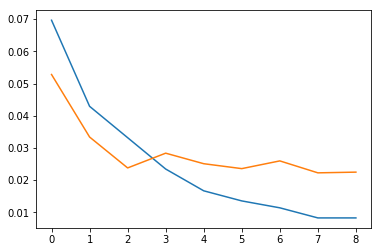

In [51]:
plt.plot([joints_1.get(sep,0)/total_stockouts_1 for sep in sep_range[1:]])
plt.plot([joints_2.get(sep,0)/total_stockouts_1_ for sep in sep_range[1:]])

In [52]:
joint = set()
sep = l_1
for i in np.where((i_2_q[-n:] < 0))[0]:
    if stockouts_1_[i+sep]:
        joint.add(j)
            
len(joint)/stockouts_1.sum()

0.0001650709805216243

In [53]:
joint = set()
sep = si_1+l_1
for i in np.where((i_1_q[-n:] < 0))[0]:
    for j in range(int(i-sep),int(i+sep+1)):
        if j in joint:
            continue
        if stockouts_2[j]:
            joint.add(j)
            
len(joint)/stockouts_2.sum()

0.7655492304448661

In [54]:
joint = set()
sep = si_1+l_1
for i in np.where((i_1_q_[-n:] < 0))[0]:
    for j in range(int(i-sep),int(i+sep+1)):
        if j in joint:
            continue
        if stockouts_2[j]:
            joint.add(j)
            
len(joint)/stockouts_2.sum()

0.4543537845245625